# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/aprilkim/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/aprilkim/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
#, data_home='~/datasets/mnist'
mnist = fetch_mldata('MNIST original')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

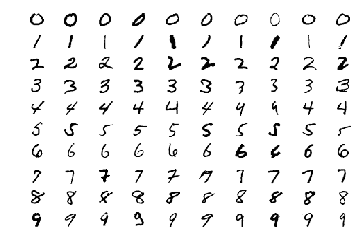

In [3]:
def P1(num_examples=10):

### STUDENT START ###

    # for each digit from train_lables
    for x in np.unique(train_labels):
        # create ndarray of features of each digit x 10 examples
        features = train_data[train_labels == x][:num_examples]
        # for each of the number examples
        for y in range(num_examples):
            # create subplot
            plt.subplot(len(np.unique(train_labels)), num_examples, num_examples*x+y+1)
            plt.axis('off')
            # reshape the dimension from (784,) to (28,28)
            digit = features[y].reshape((28,28))
            plt.imshow(digit, cmap='Greys')
    
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):

### STUDENT START ###

    # loop through different values of k
    for k in k_values:
        # create knn object
        knn_model = KNeighborsClassifier(n_neighbors=k)
        # fit training data on the labels
        knn_model.fit(mini_train_data, mini_train_labels) 
        # calculate the accuracy
        accuracy = knn_model.score(dev_data, dev_labels)
        print "k = {}; accuracy = {:.3}".format(k, accuracy)

    # show precision recall, and F1 for each lable for k=1
    knn_model = KNeighborsClassifier(n_neighbors=1)
    knn_model.fit(mini_train_data, mini_train_labels)
    knn_predictions = knn_model.predict(dev_data)
    # report displays
    print classification_report(y_true = dev_labels, y_pred = knn_predictions)

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k = 1; accuracy = 0.888
k = 3; accuracy = 0.878
k = 5; accuracy = 0.869
k = 7; accuracy = 0.865
k = 9; accuracy = 0.863
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



ANSWER: 9 has the lowest F1, which indicates it is the most difficult to predict. 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    # create model similar to P2
    knn_model = KNeighborsClassifier(n_neighbors=1)
    # loop through each training size and create a knn model
    for size in train_sizes:
        # set timer to measure time needed for prediction
        start_time = time.time()
        # fit model with trainint set
        knn_model.fit(train_data[:size], train_labels[:size])
        knn_preds = knn_model.predict(dev_data)
        # estimate dev set accuracy
        accuracy = knn_model.score(dev_data, dev_labels) 
        run_time = round(time.time() - start_time, 3)
        accuracies.append(accuracy)
        
        # print results
        print "training size = {}; accuracy = {:3}; time = {}".format(size, accuracy, run_time)
    

    
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

training size = 100; accuracy = 0.72; time = 0.185
training size = 200; accuracy = 0.786; time = 0.371
training size = 400; accuracy = 0.841; time = 0.754
training size = 800; accuracy = 0.884; time = 1.714
training size = 1600; accuracy = 0.902; time = 3.318
training size = 3200; accuracy = 0.926; time = 6.692
training size = 6400; accuracy = 0.937; time = 13.917
training size = 12800; accuracy = 0.959; time = 31.177
training size = 25000; accuracy = 0.97; time = 67.675


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

regression model accuracy for n=60000: 1.24307226036


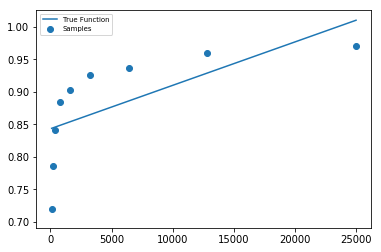

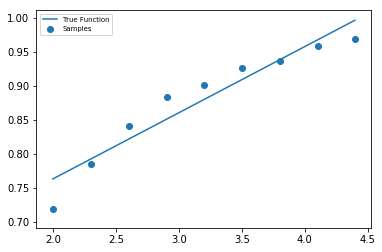

regression model accuracy for n=log(60000): 1.03386513757


In [6]:
def P4():

### STUDENT START ###

    # create arrays for size and accuracies; reshape
    train_sizes_lm = np.asarray(train_sizes).reshape(-1,1)
    accuracies_lm = np.asarray(accuracies).reshape(-1,1)
    # fit linear regression model
    lr = LinearRegression()
    lr.fit(train_sizes_lm, accuracies_lm)

    # predict n=60000
    print "regression model accuracy for n=60000: {}".format(lr.predict(60000)[0][0])

    plt.scatter(train_sizes_lm, accuracies_lm, label = "Samples")
    plt.plot(train_sizes_lm, lr.predict(train_sizes_lm), label = 'True Function')
    plt.legend(loc='best', fontsize='x-small')
    plt.title("")
    plt.show()

    # apply transformation to make predictions more reasonable 
    # perform log transformation of size
    train_log = np.log10(train_sizes_lm)
    # fit linear regression model on transformed data
    lr_log = LinearRegression()
    lr_log.fit(train_log, accuracies_lm)

    plt.scatter(train_log, accuracies_lm, label = "Samples")
    plt.plot(train_log, lr_log.predict(train_log), label = 'True Function')
    plt.legend(loc='best', fontsize='x-small')
    plt.title("")
    plt.show()

    # predict n=60000
    print "regression model accuracy for n=log(60000): {}".format(lr_log.predict(np.log10(60000))[0][0])


### STUDENT END ###

P4()

ANSWER: Regression model that predicts for n=60000 gives accuracy of 1.24307226036, which is more than the maximum value of accuracy and therefore use of linear regression does not work. Applying log transformation fit the dataset the best, although the predicted value for n=60000 is still above 1.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


The most confused pair of digits is 4 and 9




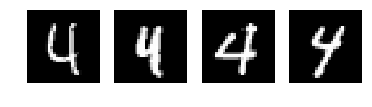

In [7]:
def P5():

    ### STUDENT START ###

    # create 1-NN model similar to P3
    knn_model = KNeighborsClassifier(n_neighbors=1)
    # fit the model
    knn_model.fit(mini_train_data, mini_train_labels)
    knn_preds = knn_model.predict(dev_data)
    # create confusion matrix and print
    print "Confusion Matrix\n"
    print confusion_matrix(dev_labels, knn_preds)

    print"\n\nThe most confused pair of digits is 4 and 9\n\n"

    x = 0
    plot_position = 1
    while plot_position < 5:
        if (dev_labels[x] == 4) and (knn_preds[x] == 9):  
            plt.subplot(1,4,plot_position)
            plt.imshow(dev_data[x,].reshape((28,28)), cmap='gray') 
            plt.axis('off') 
            plot_position += 1
        x += 1
    
    ### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [8]:
def P6():
    
### STUDENT START ###

    def gaussian_blur(digit):
        # duplicate image
        blurred_copy = np.zeros(digit.shape)
        for x in range(blurred_copy.shape[0]):
            # reshape to 28 x 28 matrix
            copy_reshaped = np.reshape(blurred_copy[x], (28,28))
            for row in range(copy_reshaped.shape[0]):
                for col in range(copy_reshaped.shape[1]):
                    # for 8 neighboring
                    # calculate weighted average
                    if (row > 0 and row < 27 and col > 0 and col < 27):
                        # bottom row (3 pixels)
                        lower_left = copy_reshaped[row+1][col-1]
                        lower_middle = copy_reshaped[row+1][col]
                        lower_right = copy_reshaped[row+1][col+1]
                        # middle row (2 pixels)
                        middle_left = copy_reshaped[row][col-1]
                        middle_right = copy_reshaped[row][col+1]
                        # top row (3 pixels)
                        top_left = copy_reshaped[row-1][col-1]
                        top_middle = copy_reshaped[row-1][col]
                        top_right = copy_reshaped[row-1][col+1]

                        copy_reshaped[row][col] = (copy_reshaped[row][col] + 
                                                   lower_left + lower_middle + lower_right +
                                                   middle_left + middle_right +
                                                   top_left + top_middle + top_right) * 0.111
            # reshape blurred image to 784 and set as duplicated image
            blurred_copy[x] = np.reshape(copy_reshaped, (784))
        return blurred_copy                                     

    # application 1: preprocess the training data but not the dev data
    processed_mini_train = gaussian_blur(mini_train_data)
    # train model
    knn_model1 = KNeighborsClassifier(n_neighbors=1)
    knn_model1.fit(processed_mini_train, mini_train_labels)
    knn_predictions1 = knn_model1.predict(dev_data)    
    print "Application 1 accuracy: {}".format(np.mean(knn_predictions1 == dev_labels))

    # application 2: preprocess the dev data but not the training data
    processed_dev_data = gaussian_blur(dev_data)
    # train model
    knn_model2 = KNeighborsClassifier(n_neighbors=1)
    knn_model2.fit(mini_train_data, mini_train_labels)
    knn_predictions2 = knn_model2.predict(processed_dev_data)
    print "Application 2 accuracy: {}".format(np.mean(knn_predictions2 == dev_labels))

    # application 3: preprocess both training and dev data
    # train model
    knn_model3 = KNeighborsClassifier(n_neighbors=1)
    knn_model3.fit(processed_mini_train, mini_train_labels)
    knn_predictions3 = knn_model3.predict(processed_dev_data)
    print "Application 3 accuracy: {}".format(np.mean(knn_predictions3 == dev_labels))

### STUDENT END ###

P6()

Application 1 accuracy: 0.099
Application 2 accuracy: 0.105
Application 3 accuracy: 0.099


ANSWER: Blurring only the training data and blurring both the training and dev data gives very similar accuracies. 

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [9]:
def P7():

### STUDENT START ###

    # create BernoulliNB model with default
    bernoulli_model = BernoulliNB()
    bernoulli_model.fit(mini_train_data, mini_train_labels)
    bernoulli_accuracy = bernoulli_model.score(dev_data, dev_labels)

    print "Bernoulli NB accuracy = {:3}".format(bernoulli_accuracy)


    # create MultinomialNB model
    multinomal_model = MultinomialNB()
    trinarize_data = np.copy(mini_train_data)
    trinarize_data[mini_train_data < 0.333] = 0
    trinarize_data[np.logical_and(mini_train_data >= 0.33, mini_train_data < 0.667)] = 1
    trinarize_data[mini_train_data > 0.667] = 2
    multinomal_model.fit(trinarize_data, mini_train_labels)
    multinomal_accuracy = multinomal_model.score(dev_data, dev_labels)
    print "Multinomial NB accuracy = {:3}".format(multinomal_accuracy)

    
### STUDENT END ###

P7()

Bernoulli NB accuracy = 0.815
Multinomial NB accuracy = 0.797


ANSWER: The multi-class version does not improve the results. The binary model performs better at 81.5% compared to the multinomal model at 79.7% because the binary model has less categories and therefore increases P(feature|label) estimate.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [10]:
def P8(alphas):

### STUDENT START ###

    # perform search using GridSearchCV in Bernoulli NB model
    grid_search = GridSearchCV(BernoulliNB(binarize=0.5), alphas)
    # fit the model with mini training set
    grid_search.fit(mini_train_data, mini_train_labels)
    for score in grid_search.grid_scores_:
        print score
    return grid_search

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/Users/aprilkim/anaconda2/lib/python2.7/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


mean: 0.80300, std: 0.01644, params: {'alpha': 0.0}
mean: 0.81800, std: 0.02216, params: {'alpha': 0.0001}
mean: 0.82000, std: 0.02073, params: {'alpha': 0.001}
mean: 0.82100, std: 0.01811, params: {'alpha': 0.01}
mean: 0.81500, std: 0.02013, params: {'alpha': 0.1}
mean: 0.80000, std: 0.01188, params: {'alpha': 0.5}
mean: 0.79500, std: 0.01145, params: {'alpha': 1.0}
mean: 0.78400, std: 0.01934, params: {'alpha': 2.0}
mean: 0.72000, std: 0.02495, params: {'alpha': 10.0}


In [11]:
print "Best value = {}".format(nb.best_params_)
print "Accuracy when alpha is 0 = {}".format(nb.grid_scores_[0][1])

Best value = {'alpha': 0.01}
Accuracy when alpha is 0 = 0.803


ANSWER: The best value for alpha is 0.01. The accuracy when alpha=0 is 80.3%. I would have expected the accuracy to the highest when alpha=0 because there is no smoothin when alpha=0 but the accuracy is best when alpha=0.01, which is an unexpected outcome.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

Gaussian NB accuracy = 0.621
Gaussian NB theta = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Gaussian NB sigma = [[  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 ..., 
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]]

Gaussian NB with noise accuracy = 0.784


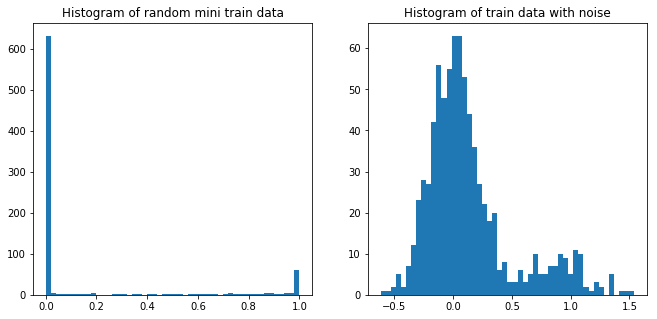

In [12]:
def P9():

### STUDENT END ###

    # create Gaussian model
    gaussian_model = GaussianNB()
    # fit the model using mini training data 
    gaussian_model.fit(mini_train_data, mini_train_labels)
    gaussian_accuracy = gaussian_model.score(dev_data, dev_labels)

    print "Gaussian NB accuracy = {:3}".format(gaussian_accuracy)
    print "Gaussian NB theta = " + str(gaussian_model.theta_)
    print "Gaussian NB sigma = " + str(gaussian_model.sigma_)
    
    # visualize random image from mini_train_data
    plt.figure(figsize=(11, 5))
    plt.subplot(1, 2, 1)
    hist = plt.hist(mini_train_data[42], bins=50)
    plt.title("Histogram of random mini train data")
    
    # add random noise to training data
    # sigma of 0.2 derived from trial of different values
    plus_noise_training_data = mini_train_data + np.random.normal(0, 0.2, mini_train_data.shape)
    
    # Gaussian model with noise
    gaussian_noise_model = GaussianNB()
    gaussian_noise_model.fit(plus_noise_training_data, mini_train_labels)
    gaussian_noise_accuracy = gaussian_noise_model.score(dev_data, dev_labels)
    
    print "\nGaussian NB with noise accuracy = {:3}".format(gaussian_noise_accuracy)
    
    # visualize random image from mini_train_data plus noise
    plt.subplot(1, 2, 2)
    hist = plt.hist(plus_noise_training_data[42], bins=50)
    plt.title("Histogram of train data with noise")
    
    return gaussian_model


### STUDENT END ###

gnb = P9()

ANSWER: Training the model using GaussianNB, evaluating the dev_data gives accuracy of 62.1%. Observing the data as a histogram, the data is almost binary, which is not suitable for Gaussian NB model that expects normally distributed data. Adding gaussian noise transforms the data to be more normally distributed and the accuracy improves by more than 15%.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

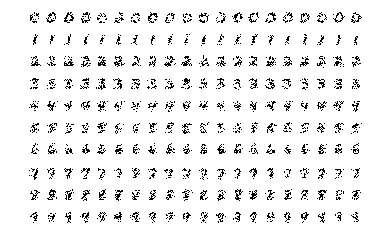

In [13]:
def P10(num_examples):

### STUDENT START ###

    # train BernoulliNB model using best alpha solved from P8
    bernoulli_model = BernoulliNB(binarize=0.5, alpha=0.01)
    bernoulli_model.fit(mini_train_data, mini_train_labels)
    
    # for each digit 
    for x in range(10):
        # for each of the 20 examples
        for y in range(num_examples):
            # generate random numbers from a uniform distribution
            random = np.random.rand(784)
            # create subplot
            plt.subplot(10, num_examples, num_examples*x+y+1)
            plt.axis('off')
            # reshape the dimension from (784,) to (28,28)
            digit = np.reshape([np.exp(bernoulli_model.feature_log_prob_)[x] > random], (28,28))
            plt.imshow(digit, cmap='Greys')


### STUDENT END ###

P10(20)

ANSWER: The generated digits are recognizable, however, much fuzzier and staticky.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [14]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    # train BernoulliNB model, same as P8 and P10
    bernoulli_model = BernoulliNB(alpha=0.01, binarize=0.5)
    bernoulli_model.fit(mini_train_data, mini_train_labels)
    # predictions
    predictions = bernoulli_model.predict(dev_data)
    # predicted probabilities     
    pred_probs = bernoulli_model.predict_proba(dev_data)
    
    pred_correct = np.empty(len(dev_labels))

    # Loop through each prediction to check which maximum bucket it should fall in.
    for x in range(len(dev_labels)):
        # which bucket has max posterior for prediction?
        pred_correct[x] = np.argmax(pred_probs[x]) == dev_labels[x]
        i = 0
        for y in buckets:
            # if bucket  has max posterior 
            if np.max(pred_probs[x]) <= y:
                # update correct
                correct[i] += pred_correct[x]
                # update total
                total[i] += 1
            else:
                i += 1
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total = 240    accuracy = 0.200
p(pred) <= 0.9990000000000    total = 602    accuracy = 0.465
p(pred) <= 0.9999900000000    total = 510    accuracy = 0.612
p(pred) <= 0.9999999000000    total = 290    accuracy = 0.690
p(pred) <= 0.9999999990000    total = 244    accuracy = 0.754
p(pred) <= 0.9999999999900    total = 219    accuracy = 0.877
p(pred) <= 0.9999999999999    total = 150    accuracy = 0.840
p(pred) <= 1.0000000000000    total = 532    accuracy = 0.953


ANSWER: The classifier is weakly calibrated. The accuracy increases as the posterior probaiblity increases, however, it is weakly correlated.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()